In [17]:
from datasets.load import load_images
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def draw_bbox(ax, name, box, col='r'):
    r = patches.Rectangle((box[0], box[1]), 
                          box[2] - box[0],
                          box[3] - box[1],
                          linewidth=3,
                          edgecolor=col,
                          facecolor='none')
    ax.add_patch(r)
    ax.text(box[0], box[1], name,
            bbox={'facecolor': col, 'linewidth': 0})

def draw_annotation(ax, classes):
    colors = plt.get_cmap('tab10')
    for idx, cl in enumerate(classes):
        col = colors(idx)
        for box in cl['bounds']:
            draw_bbox(ax, cl['name'], box, col)

## Resizing sample images

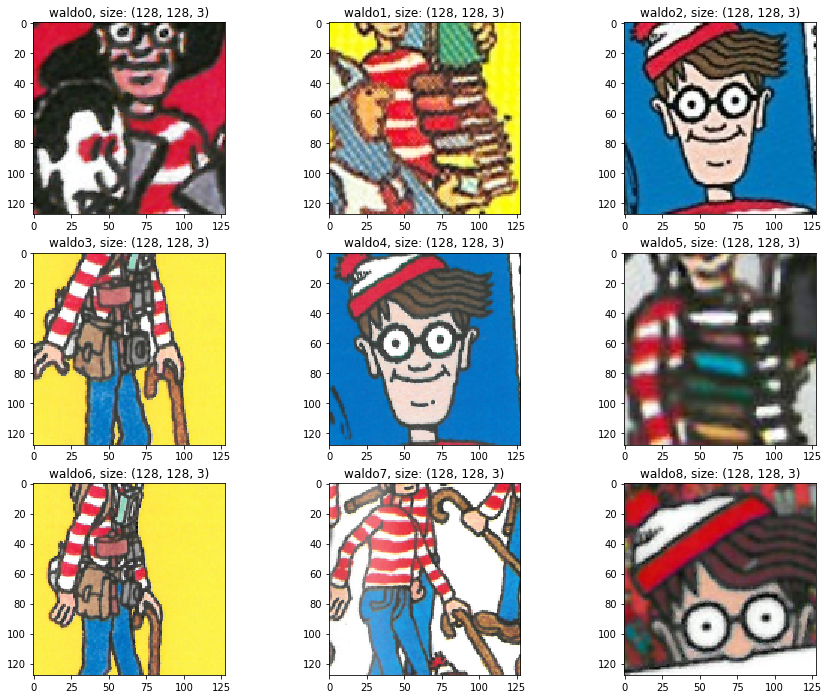

In [19]:
import pickle
import os

waldos_file = os.path.join('cache_anno', 'waldo.pkl')  
    
with open(waldos_file, 'rb') as f:
    waldos = pickle.load(f)

# resize max dimension to be 128px
size = 128
resized_waldos = []
for img in waldos:
    y, x = img.shape[:2]
    if x > y:
        d = (x - y) // 2
        img = img[:, d : y + d]
    else:
        d = (y - x) // 2
        img = img[d : x + d, :]
        
    img = cv2.resize(img, dsize=(size, size))
    resized_waldos.append(img)

waldos = resized_waldos
np.random.shuffle(waldos)

        
for idx, waldo in enumerate(waldos[:9]):
    ax = plt.subplot(3,3,idx + 1)
    plt.imshow(waldo)
    plt.title('waldo{}, size: {}'.format(idx, waldo.shape))

plt.show()

(128, 128, 3)
(512,)


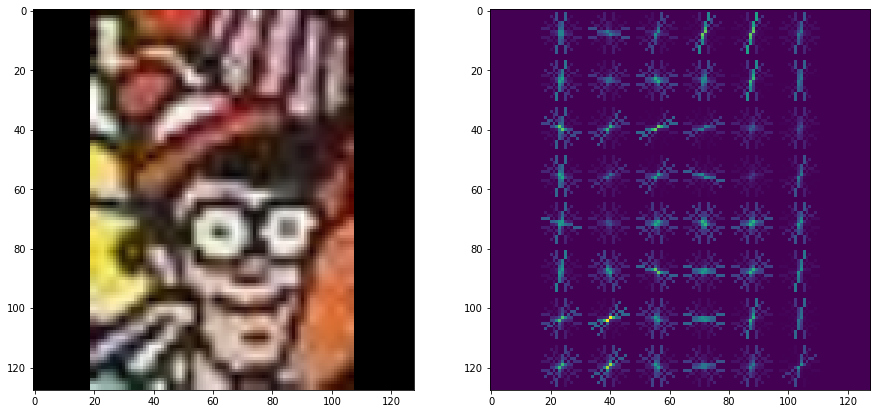

In [9]:
from skimage.feature import hog
from skimage import data, exposure

for waldo in waldos[:1]:
    print(waldo.shape)

    fd, hog_image = hog(waldo, orientations=8, pixels_per_cell=(16, 16),
                       cells_per_block=(1,1), visualize=True, multichannel=True)
    print(fd.shape)
    plt.subplot(1,2,1)
    plt.imshow(waldo)

    plt.subplot(1,2,2)
    plt.imshow(hog_image)
    plt.show()

In [ ]:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_svm/py_svm_opencv/py_svm_opencv.html?highlight=hog